In [1]:
#import necessary libaries
import pandas as pd
import os
import seaborn as sns

In [2]:
#importing all the list of the dat in one datframe
path = "SalesAnalysis/Sales_Data"
files = [file for file in os.listdir(path) if not file.startswith('.')] # Ignore hidden files

df = pd.DataFrame()

for file in files:
    current_data = pd.read_csv(path+"/"+file)
    df = pd.concat([df, current_data])
    
df.to_csv("all_data_copy.csv", index=False)

In [3]:
#checking the first five rows of the Dataframe
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


In [4]:
#Grabing the info about the dataframe contains
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 13621
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


In [5]:
#checking the NAN vslue in dataframe
nan_value = df[df.isna().any(axis=1)]
display(nan_value)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
264,NaN,NaN,NaN,NaN,NaN,NaN
648,NaN,NaN,NaN,NaN,NaN,NaN
680,NaN,NaN,NaN,NaN,NaN,NaN
1385,NaN,NaN,NaN,NaN,NaN,NaN
1495,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
12567,NaN,NaN,NaN,NaN,NaN,NaN
12640,NaN,NaN,NaN,NaN,NaN,NaN
12659,NaN,NaN,NaN,NaN,NaN,NaN
12732,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#droping all the NAN vlaue form the dataframe

df = df.dropna(how='all')

In [7]:
#dataframe without NAN value
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"
...,...,...,...,...,...,...
13617,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215"
13618,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001"
13619,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016"
13620,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016"


In [8]:
df[['Date','Time']] = df['Order Date'].str.split(' ',expand=True)

In [9]:
#checking new seperate and added date and time columns in dateframe
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Date,Time
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12/30/19,00:01
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12/29/19,07:03
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12/12/19,18:21
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12/22/19,15:13
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12/18/19,12:38


In [10]:
#Removing the string Or from the Date columns
df= df [df['Date'].str[0:2]!= 'Or']

In [11]:
#Extracting the month fromthe date
df['month'] = df['Date'].str[0:2]

<ipython-input-11-93aabe9578ca>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df['Date'].str[0:2]


In [12]:
#checking the new month column in the dateframe
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Date,Time,month
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12/30/19,00:01,12
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12/29/19,07:03,12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12/12/19,18:21,12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12/22/19,15:13,12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12/18/19,12:38,12


In [13]:
#converting the Price Each and Quantity Orderd in numeric data and  multplying the the orede and price and putting them in new column name sales
df['Sales'] = df['Qauantity Ordered'] = df['Quantity Ordered'].astype('float')*df['Price Each'].astype('float')

<ipython-input-13-e28612d170f7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sales'] = df['Qauantity Ordered'] = df['Quantity Ordered'].astype('float')*df['Price Each'].astype('float')


In [14]:
#Checking the type of the Price Each Column
type(df['Price Each'].iloc[0])

#Checking the type of the Quantity Ordered Column
type(df['Qauantity Ordered'].iloc[0])


numpy.float64

In [15]:
#checking the first five dataframe to see the result in the new column Sales
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Date,Time,month,Sales,Qauantity Ordered
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12/30/19,00:01,12,1700.00,1700.00
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12/29/19,07:03,12,600.00,600.00
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12/12/19,18:21,12,11.95,11.95
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12/22/19,15:13,12,149.99,149.99
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12/18/19,12:38,12,11.95,11.95


In [16]:
#Here all the dat from the df is group by month and make them total of all in the basis of the month 
result = df.groupby(['month']).sum()
result.head()

,Sales,Qauantity Ordered
month,,
01,1.822257e+06,1.822257e+06
02,2.202022e+06,2.202022e+06
03,2.807100e+06,2.807100e+06
04,3.390670e+06,3.390670e+06
05,3.152607e+06,3.152607e+06


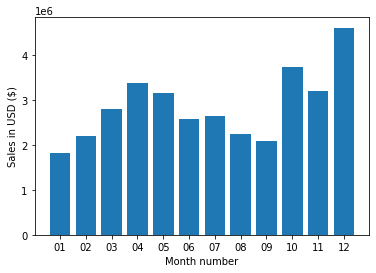

In [17]:
#importing matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

months = [months for months, df in df.groupby(['month'])]
plt.bar(months,result['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()

In [18]:
#checking head of the dataframe to make easy to analysis below
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Date,Time,month,Sales,Qauantity Ordered
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12/30/19,00:01,12,1700.00,1700.00
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12/29/19,07:03,12,600.00,600.00
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12/12/19,18:21,12,11.95,11.95
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12/22/19,15:13,12,149.99,149.99
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12/18/19,12:38,12,11.95,11.95


In [20]:
#changing the date column into date formate 
df['Order Date'] = pd.to_datetime(df['Order Date'])

<ipython-input-20-bc5349fbed90>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Order Date'] = pd.to_datetime(df['Order Date'])


In [21]:
#extracting the hours from the converted date and putting them in new column name "Hour"
df['Hour']=df['Order Date'].dt.hour

<ipython-input-21-60690fbe5566>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Hour']=df['Order Date'].dt.hour


In [22]:
#extracting the Minutes from the converted date and putting them in new column name "Minutes"

df['Miutes'] = df['Order Date'].dt.minute

<ipython-input-22-f9148405376a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Miutes'] = df['Order Date'].dt.minute


In [24]:
#Checking the top 20 dataframe 
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Date,Time,month,Sales,Qauantity Ordered,Hour,Miutes
0,295665,Macbook Pro Laptop,1,1700,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12/30/19,00:01,12,1700.00,1700.00,0,1
1,295666,LG Washing Machine,1,600.0,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12/29/19,07:03,12,600.00,600.00,7,3
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12/12/19,18:21,12,11.95,11.95,18,21
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12/22/19,15:13,12,149.99,149.99,15,13
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12/18/19,12:38,12,11.95,11.95,12,38


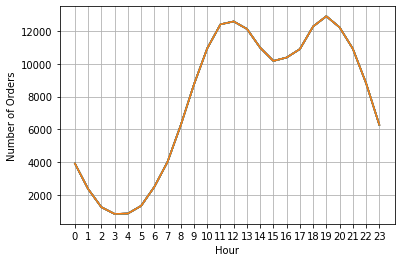

In [25]:
#from the plotting evaluating nummber of more order occurs in which hours i.e finding the peak hours of the order from customers.
hour = [hour for hour,df in df.groupby('Hour')]
plt.plot(hour,df.groupby(['Hour']).count())
plt.xticks(hour)
plt.xlabel('Hour')
plt.ylabel('Number of Orders')

plt.grid()
plt.show()

From above plot result it shows that the peaks hour for order is 11-13 and 18-20.

**What product are most often sold together?**

In [26]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Date,Time,month,Sales,Qauantity Ordered,Hour,Miutes
0,295665,Macbook Pro Laptop,1,1700,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12/30/19,00:01,12,1700.00,1700.00,0,1
1,295666,LG Washing Machine,1,600.0,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12/29/19,07:03,12,600.00,600.00,7,3
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12/12/19,18:21,12,11.95,11.95,18,21
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12/22/19,15:13,12,149.99,149.99,15,13
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12/18/19,12:38,12,11.95,11.95,12,38


In [32]:
df.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'Date', 'Time', 'month', 'Sales',
       'Qauantity Ordered', 'Hour', 'Miutes'],
      dtype='object')

In [29]:
new_df = df[df['Order ID'].duplicated(keep=False)]
new_df['Grouped'] = new_df.groupby('Order ID')['Product'].transform(lambda x:','.join(x))
new_df2 = new_df[['Order ID','Grouped']].drop_duplicates()
new_df2.head()

<ipython-input-29-53989469a4ac>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Grouped'] = new_df.groupby('Order ID')['Product'].transform(lambda x:','.join(x))


,Order ID,Grouped
16,295681,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
36,295698,"Vareebadd Phone,USB-C Charging Cable"
42,295703,"AA Batteries (4-pack),Bose SoundSport Headphones"
66,295726,"iPhone,Lightning Charging Cable"
76,295735,"iPhone,Apple Airpods Headphones,Wired Headphones"


In [30]:
#checking most ordered items in combination of 2 
from itertools import combinations
from collections import Counter

count= Counter()

for row in new_df2['Grouped']:
    row_list= row.split(',')
    count.update(Counter(combinations(row_list, 2)))#we can change the combination of item with the change value of the numeric value.


for key , value in  count.most_common(10):
    print(key,value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


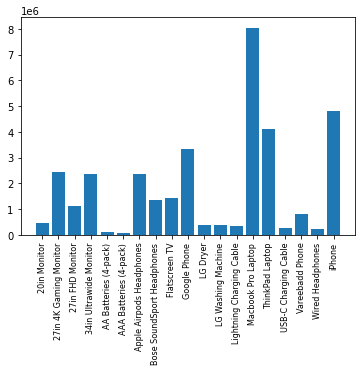

In [33]:
product_group = df.groupby('Product')
quantity_ordered = product_group.sum()['Qauantity Ordered']

keys = [pair for pair, df in product_group]
plt.bar(keys, quantity_ordered)
plt.xticks(keys, rotation='vertical', size=8)
plt.show()